## This script cannot be run on mybinder, since packages including `gganimate` and `gridExtra` are not available

In [1]:
# Uncomment this session to install packages 
# install.packages('ggplot2')
# install.packages('gapminder')
# install.packages('gganimate')
# install.packages('gifski')
# install.packages('av')
# install.packages('Rcpp')

In [2]:
library(ggplot2)
library(gganimate)
library(gridExtra)

Warning message:
"package 'gganimate' was built under R version 4.1.1"


In [3]:
# Data generation
set.seed(1)
n=200; # 200 balls 
r=5; # 5 factor levels (colors)
radius.mean=2*(2:(r+1)); 
#radius.mean=rep(3,r);  # What if we set the mean to be the same?
X=sample(1:r,size=n,replace=TRUE) # factor levels, random samples

Y=radius.mean[X]+rnorm(n,sd=0.9); # response Y


In [4]:
round(Y,digits=2)

[1]  2.75 11.68  4.38  5.79 12.95  8.80  5.44  9.99  7.77  2.72 11.87 12.19
 [13]  8.08  6.10  4.41 11.93 11.70  3.97  4.71 13.87 12.92  7.09  4.89  4.89
 [25] 10.20  2.68 10.47  7.86  7.32  5.31  9.61  9.17  9.84  6.36  9.34  4.75
 [37]  2.91  9.06  5.30  5.09  8.37  5.66  6.37 13.52  7.43  3.70  5.94 10.25
 [49] 10.60  8.49  3.99 10.46 11.85  4.38  3.64  8.77 12.89 13.37  9.72 10.87
 [61] 10.58  9.96  2.44 12.00 11.43  3.69  2.96  9.62  5.70  4.56  8.18  6.24
 [73]  9.11  5.40 11.42  6.51  5.95  3.91  8.50  6.93  6.99  6.00 12.64  6.93
 [85] 12.20  9.21 13.05  8.20  3.51  7.77  5.85  8.92  8.12  4.37 11.94  9.78
 [97] 10.63  5.03  9.84 12.52  4.34  7.62  8.86  7.65  7.74 10.77  5.55  4.24
[109]  9.62  4.93  3.70  5.15  7.77 10.35  3.23 10.38 12.14  9.02  7.94  6.67
[121]  2.82 10.83  4.36  9.63  7.19 11.37  5.48  5.10  5.40  8.85  4.39  6.90
[133]  7.65  8.34  8.22  6.72 13.60  8.12  4.69  6.86  9.95  5.72  6.80  9.06
[145] 13.77  3.65 13.49 13.36 12.07 10.51  9.08 10.29  6.94  4.09  7.59  3.41
[157]  3.97 10.96 11.56  3.89  6.84 10.44 13.18 11.35  4.73  2.32 12.43 12.41
[169]  3.68 12.15  9.22  6.61  5.71  2.59 11.67 13.23  5.70 12.66  6.85 10.00
[181]  5.68 11.52 12.67  9.04 10.22  3.74  3.96  8.73  4.82  3.83  8.72  5.70
[193]  5.33 10.61  8.34 11.83  9.42 12.54  2.94  3.86

In [5]:
# Parameters for visualizations
T = 10; # frame number for animation
xyrange=6;
# x and y coordinates

coords.x=matrix(0,nrow=n,ncol=T);
coords.y=matrix(0,nrow=n,ncol=T)
coords.x[,1]= xyrange*runif(n);
coords.y[,1]= xyrange*runif(n);

coords.x[,T]= X + 0.8*(runif(n)-0.5);
coords.y[,T]= coords.y[,1]

for(i in 1:n){
    coords.x[i,]=seq(from=coords.x[i,1],to=coords.x[i,T],length.out=T)
    coords.y[i,]=seq(from=coords.y[i,1],to=coords.y[i,T],length.out=T)
}


In [6]:

# Wrap these into a data.frame (in order to use ggplot2)

example.ANOVA<-data.frame(
    X=X,
    Y=Y,
    coords.x=coords.x[,1],
    coords.y=coords.y[,1],
    ID= 1:n,
    t= rep(1,n)
)

for(l in 2:T){

    
tmp.ANOVA<-data.frame(
    X=X,
    Y=Y,
    coords.x=coords.x[,l],
    coords.y=coords.y[,l],
    ID= 1:n,
    t= rep(l,n)
)
example.ANOVA<-rbind(example.ANOVA,tmp.ANOVA)
    
}

# add a few more frames at the end:
for(l in (T+1):(T+6)){
    
tmp.ANOVA<-data.frame(
    X=X,
    Y=Y,
    coords.x=coords.x[,T],
    coords.y=coords.y[,T],
    ID= 1:n,
    t= rep(l,n)
)
example.ANOVA<-rbind(example.ANOVA,tmp.ANOVA)
    
}


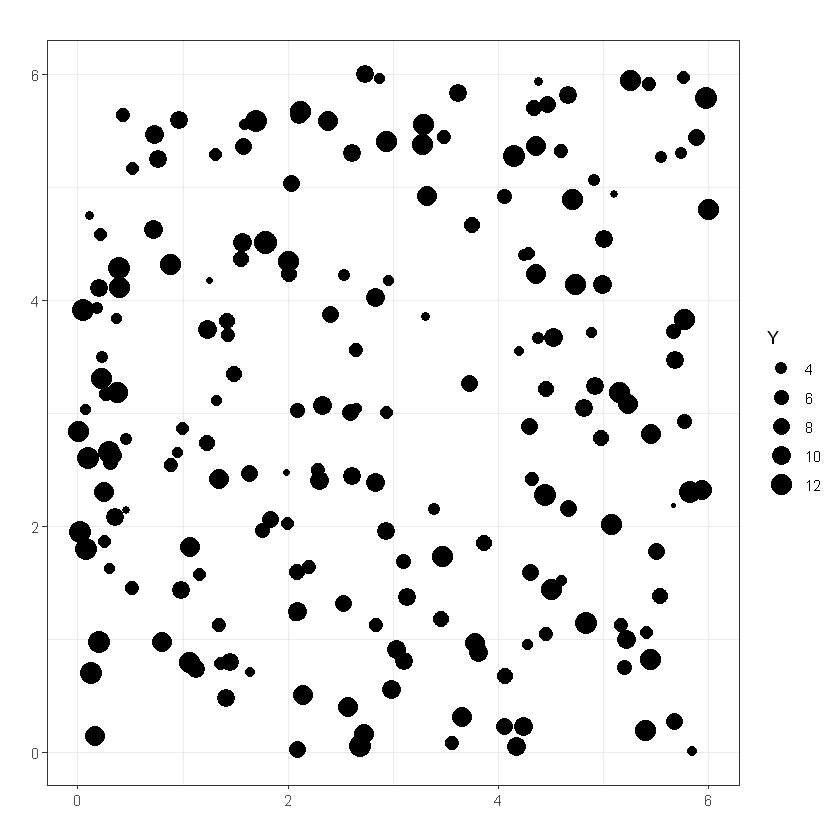

In [7]:
# Visualize the data

tmp.data<-example.ANOVA[example.ANOVA$t==1,]
ggplot(tmp.data, aes(coords.x, coords.y, size = Y)) +
  geom_point() +
  labs(title = '', x = '', y = '') +
  theme_bw() 
  

In [8]:
# variance estimate:

var.all=var(Y) 

ssto= sum((Y-mean(Y))^2)

var.all - ssto/(n-1)

[1] 0

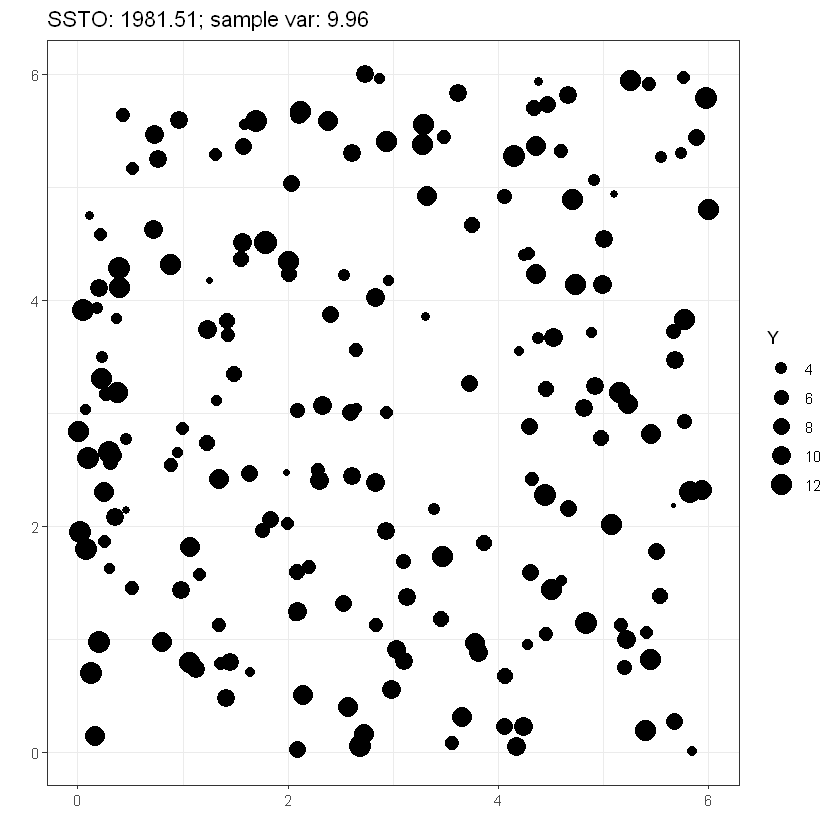

In [9]:
# Visualize the data with variance estimate:
tmp.data<-example.ANOVA[example.ANOVA$t==1,]
ggplot(tmp.data, aes(coords.x, coords.y, size = Y)) +
  geom_point() +
  labs(title = paste('SSTO: ', round(ssto,2), '; sample var: ', round(var.all,2),sep='') , x = '', y = '') +
  theme_bw() 
 

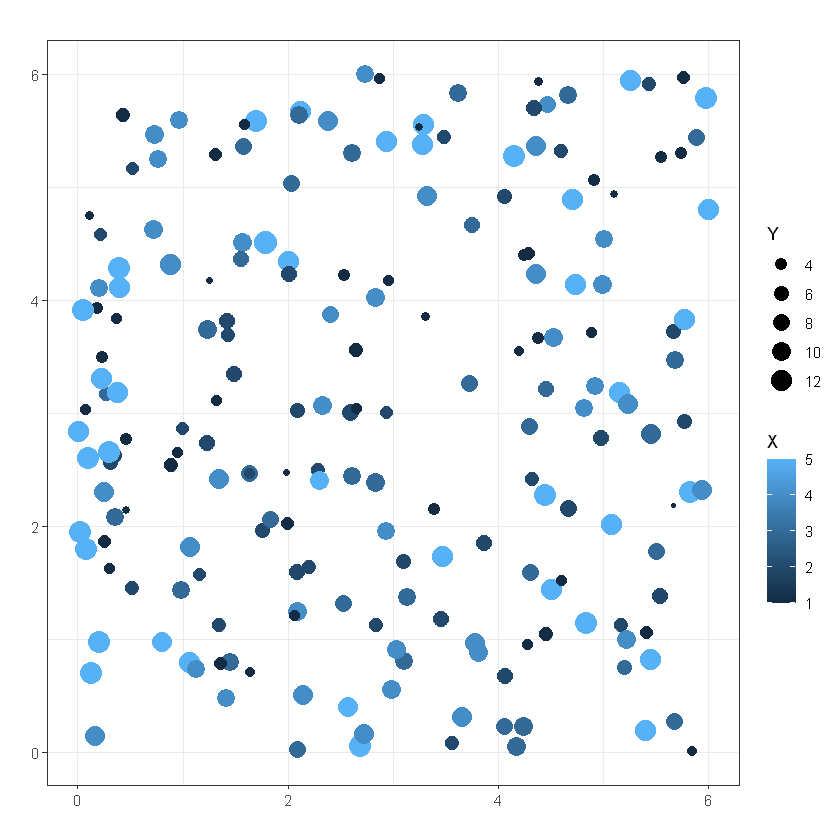

In [10]:
# Visualize the data with colors by X

tmp.data<-example.ANOVA[example.ANOVA$t==1,]
ggplot(tmp.data, aes(coords.x, coords.y, size = Y,color=X)) +
  geom_point() +
  labs(title = '', x = '', y = '') +
  theme_bw() 
  

In [11]:

# Animation

options(repr.plot.width=8, repr.plot.height=8)
ggplot(example.ANOVA, aes(coords.x, coords.y, size = Y, color = X)) +
  geom_point() +
  theme_bw() +
  # gganimate specific bits:
  labs(title = '', x = '', y = '') +
  transition_time(t) +
  ease_aes('linear')

anim_save("anova-movement.gif")


Rendering [>---------------------------------------------] at 6 fps ~ eta: 16s

Rendering [>-------------------------------------------] at 5.5 fps ~ eta: 18s

Rendering [=>------------------------------------------] at 5.5 fps ~ eta: 18s

Rendering [=>------------------------------------------] at 5.4 fps ~ eta: 18s

Rendering [==>-----------------------------------------] at 5.3 fps ~ eta: 18s

Rendering [===>----------------------------------------] at 5.4 fps ~ eta: 17s

Rendering [===>----------------------------------------] at 5.3 fps ~ eta: 17s

Rendering [====>---------------------------------------] at 5.3 fps ~ eta: 17s

Rendering [=====>----------------------------------------] at 5 fps ~ eta: 17s

Rendering [=====>--------------------------------------] at 5.1 fps ~ eta: 17s

Rendering [======>---------------------------------------] at 5 fps ~ eta: 17s

Rendering [======>-------------------------------------] at 5.1 fps ~ eta: 16s

Rendering [=======>--------------------

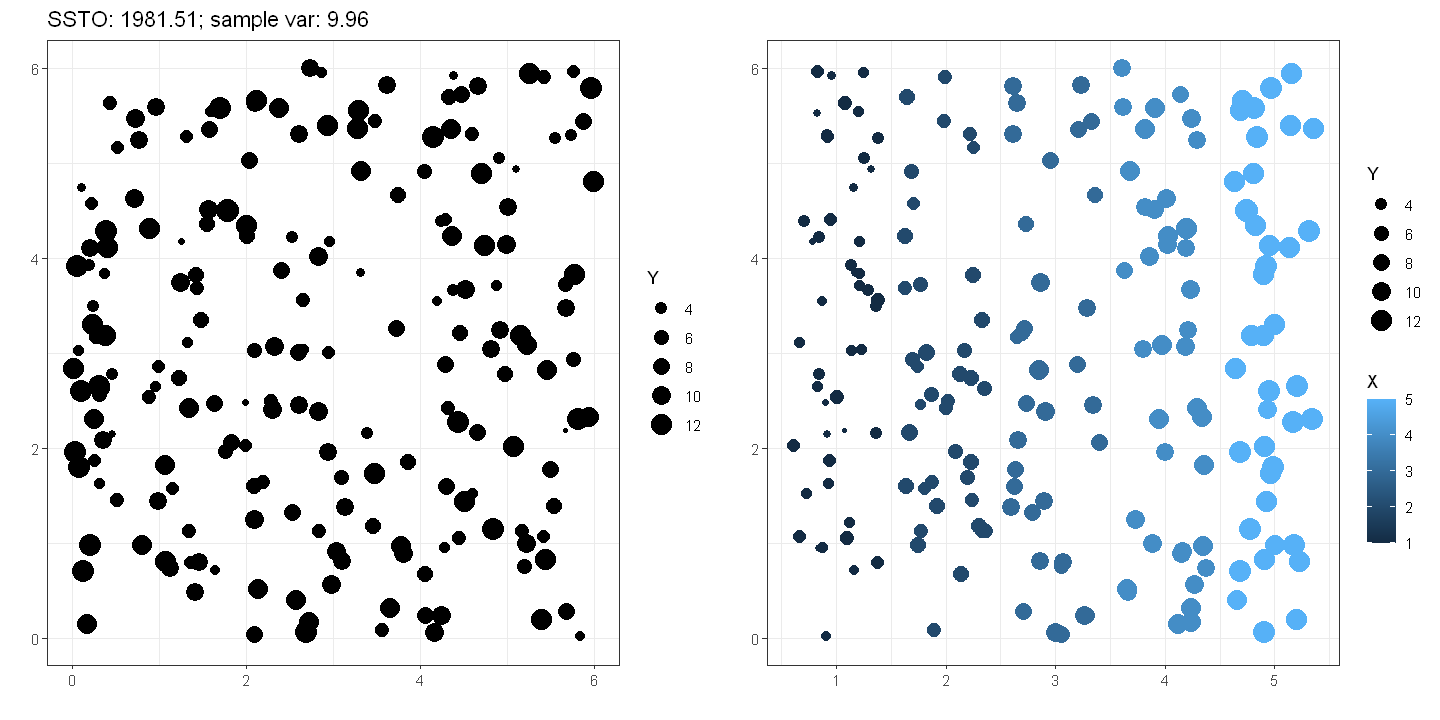

In [12]:
###### Visualize the data side by side 



options(repr.plot.width=12, repr.plot.height=6)
tmp1.data<-example.ANOVA[example.ANOVA$t==1,]
plot1<-ggplot(tmp1.data, aes(coords.x, coords.y, size = Y)) +
  geom_point() +
  labs(title = paste('SSTO: ', round(ssto,2), '; sample var: ', round(var.all,2),sep='') , x = '', y = '') +
  theme_bw() 
  

tmpT.data<-example.ANOVA[example.ANOVA$t==T,]
plotT=ggplot(tmpT.data, aes(coords.x, coords.y, size = Y,color=X)) +
  geom_point() +
  labs(title = '', x = '', y = '') +
  theme_bw() 
  


grid.arrange(plot1, plotT, ncol=2)

In [13]:
# Calculate the residual sum of squares and variance of the error terms

anova.fit=aov(Y~X)
anova.table=summary(anova.fit)

sse=anova.table[[1]][2,2]
mse=anova.table[[1]][2,3]
df.mse=n-2;
mse-sse/df.mse

[1] 0

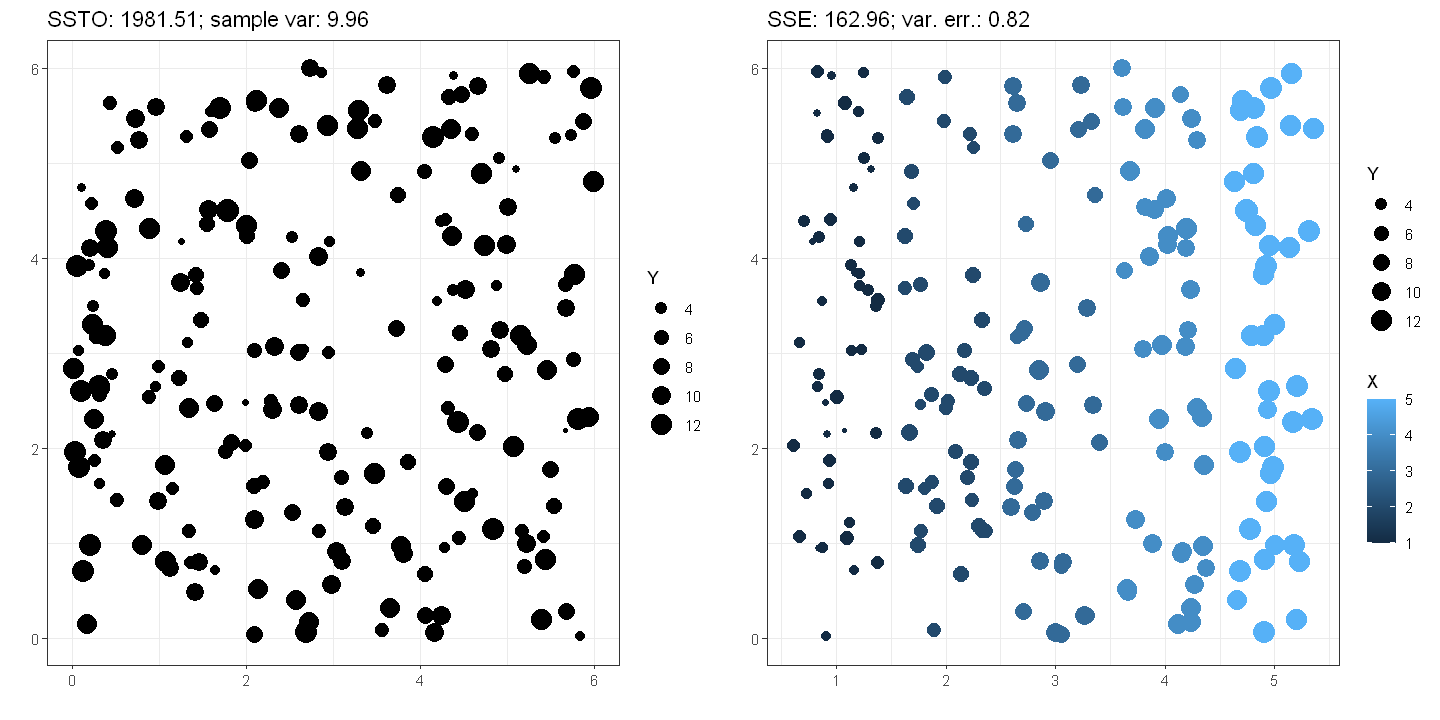

In [158]:
###### Visualize the data side by side 



options(repr.plot.width=12, repr.plot.height=6)
tmp1.data<-example.ANOVA[example.ANOVA$t==1,]
plot1<-ggplot(tmp1.data, aes(coords.x, coords.y, size = Y)) +
  geom_point() +
  labs(title = paste('SSTO: ', round(ssto,2), '; sample var: ', round(var.all,2),sep='') , x = '', y = '') +
  theme_bw() 
  

tmpT.data<-example.ANOVA[example.ANOVA$t==T,]
plotT=ggplot(tmpT.data, aes(coords.x, coords.y, size = Y,color=X)) +
  geom_point() +
   labs(title = paste('SSE: ', round(sse,2), '; var. err.: ', round(mse,2),sep='') , x = '', y = '') +
  theme_bw() 
  


grid.arrange(plot1, plotT, ncol=2)